# Test con m2

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [3]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [4]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [5]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [6]:
data.floor.value_counts()

1                       4046
2                       3233
3                       2722
4                       2117
Bajo                    1829
5                       1225
6                        844
7                        537
8                        309
Entreplanta exterior     225
9                        175
Semi-sótano exterior      50
Entreplanta interior      32
Semi-sótano interior      29
Sótano interior           21
Sótano exterior            4
Name: floor, dtype: int64

In [7]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [8]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [9]:
data.floor = pd.to_numeric(data.floor)

In [10]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",0,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",0,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",0,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",0,0,0,64.0,2,1.0,0,1,1,0,1,0,0,0,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",0,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,260000,2407,40.355841,-3.688399


In [11]:
data.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude'],
      dtype='object')

In [12]:
data = data [['house_type_id', 'is_renewal_needed', 'is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'buy_price_by_area']]

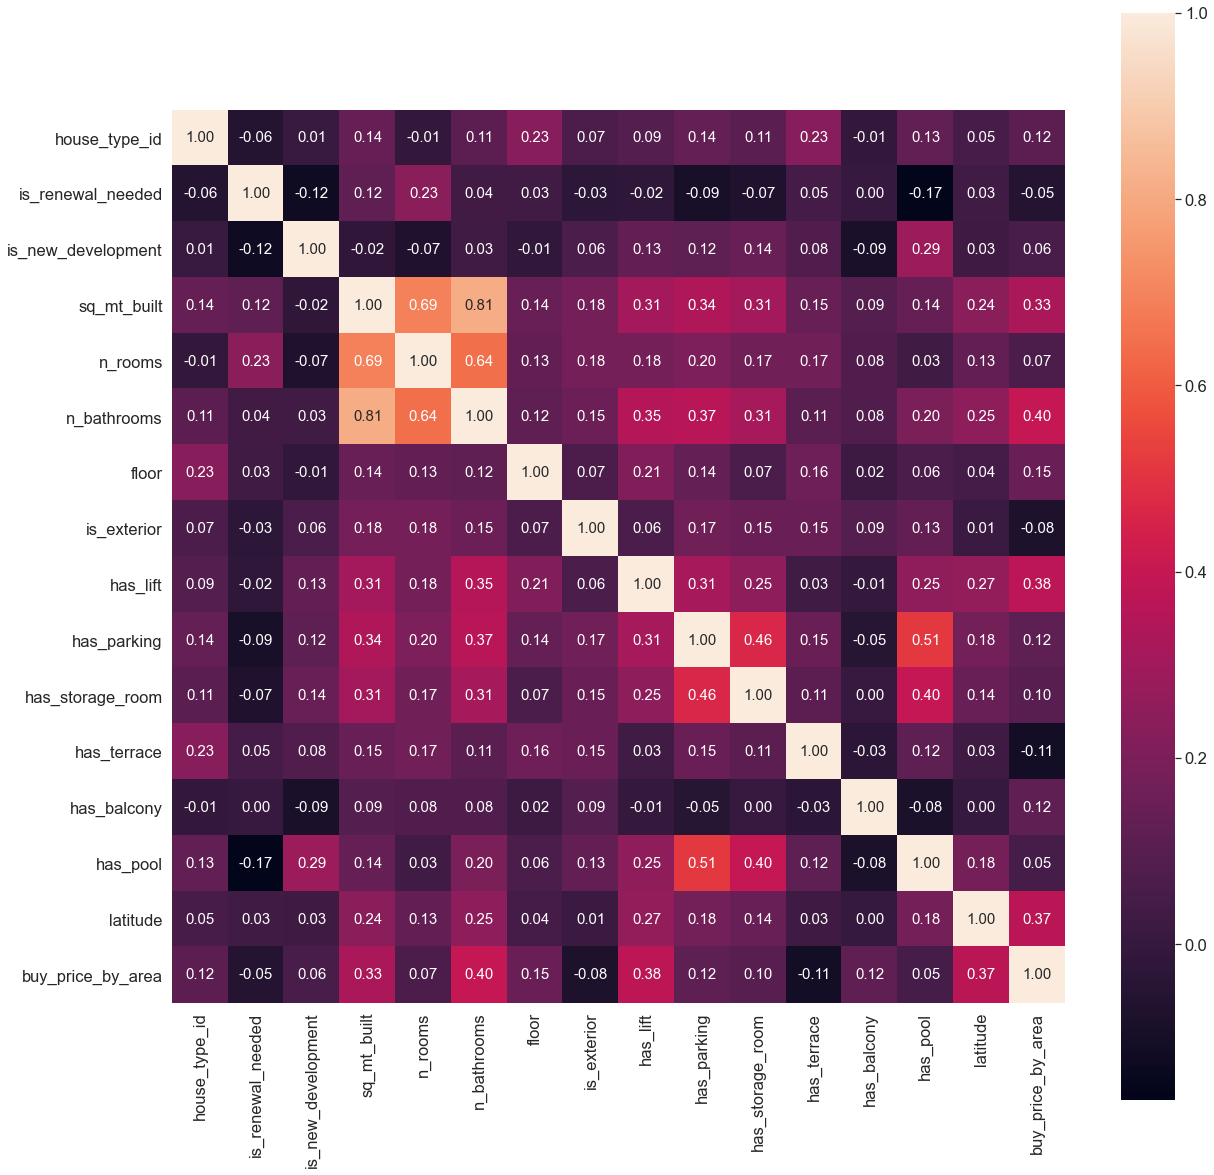

In [13]:
# Heatmap.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


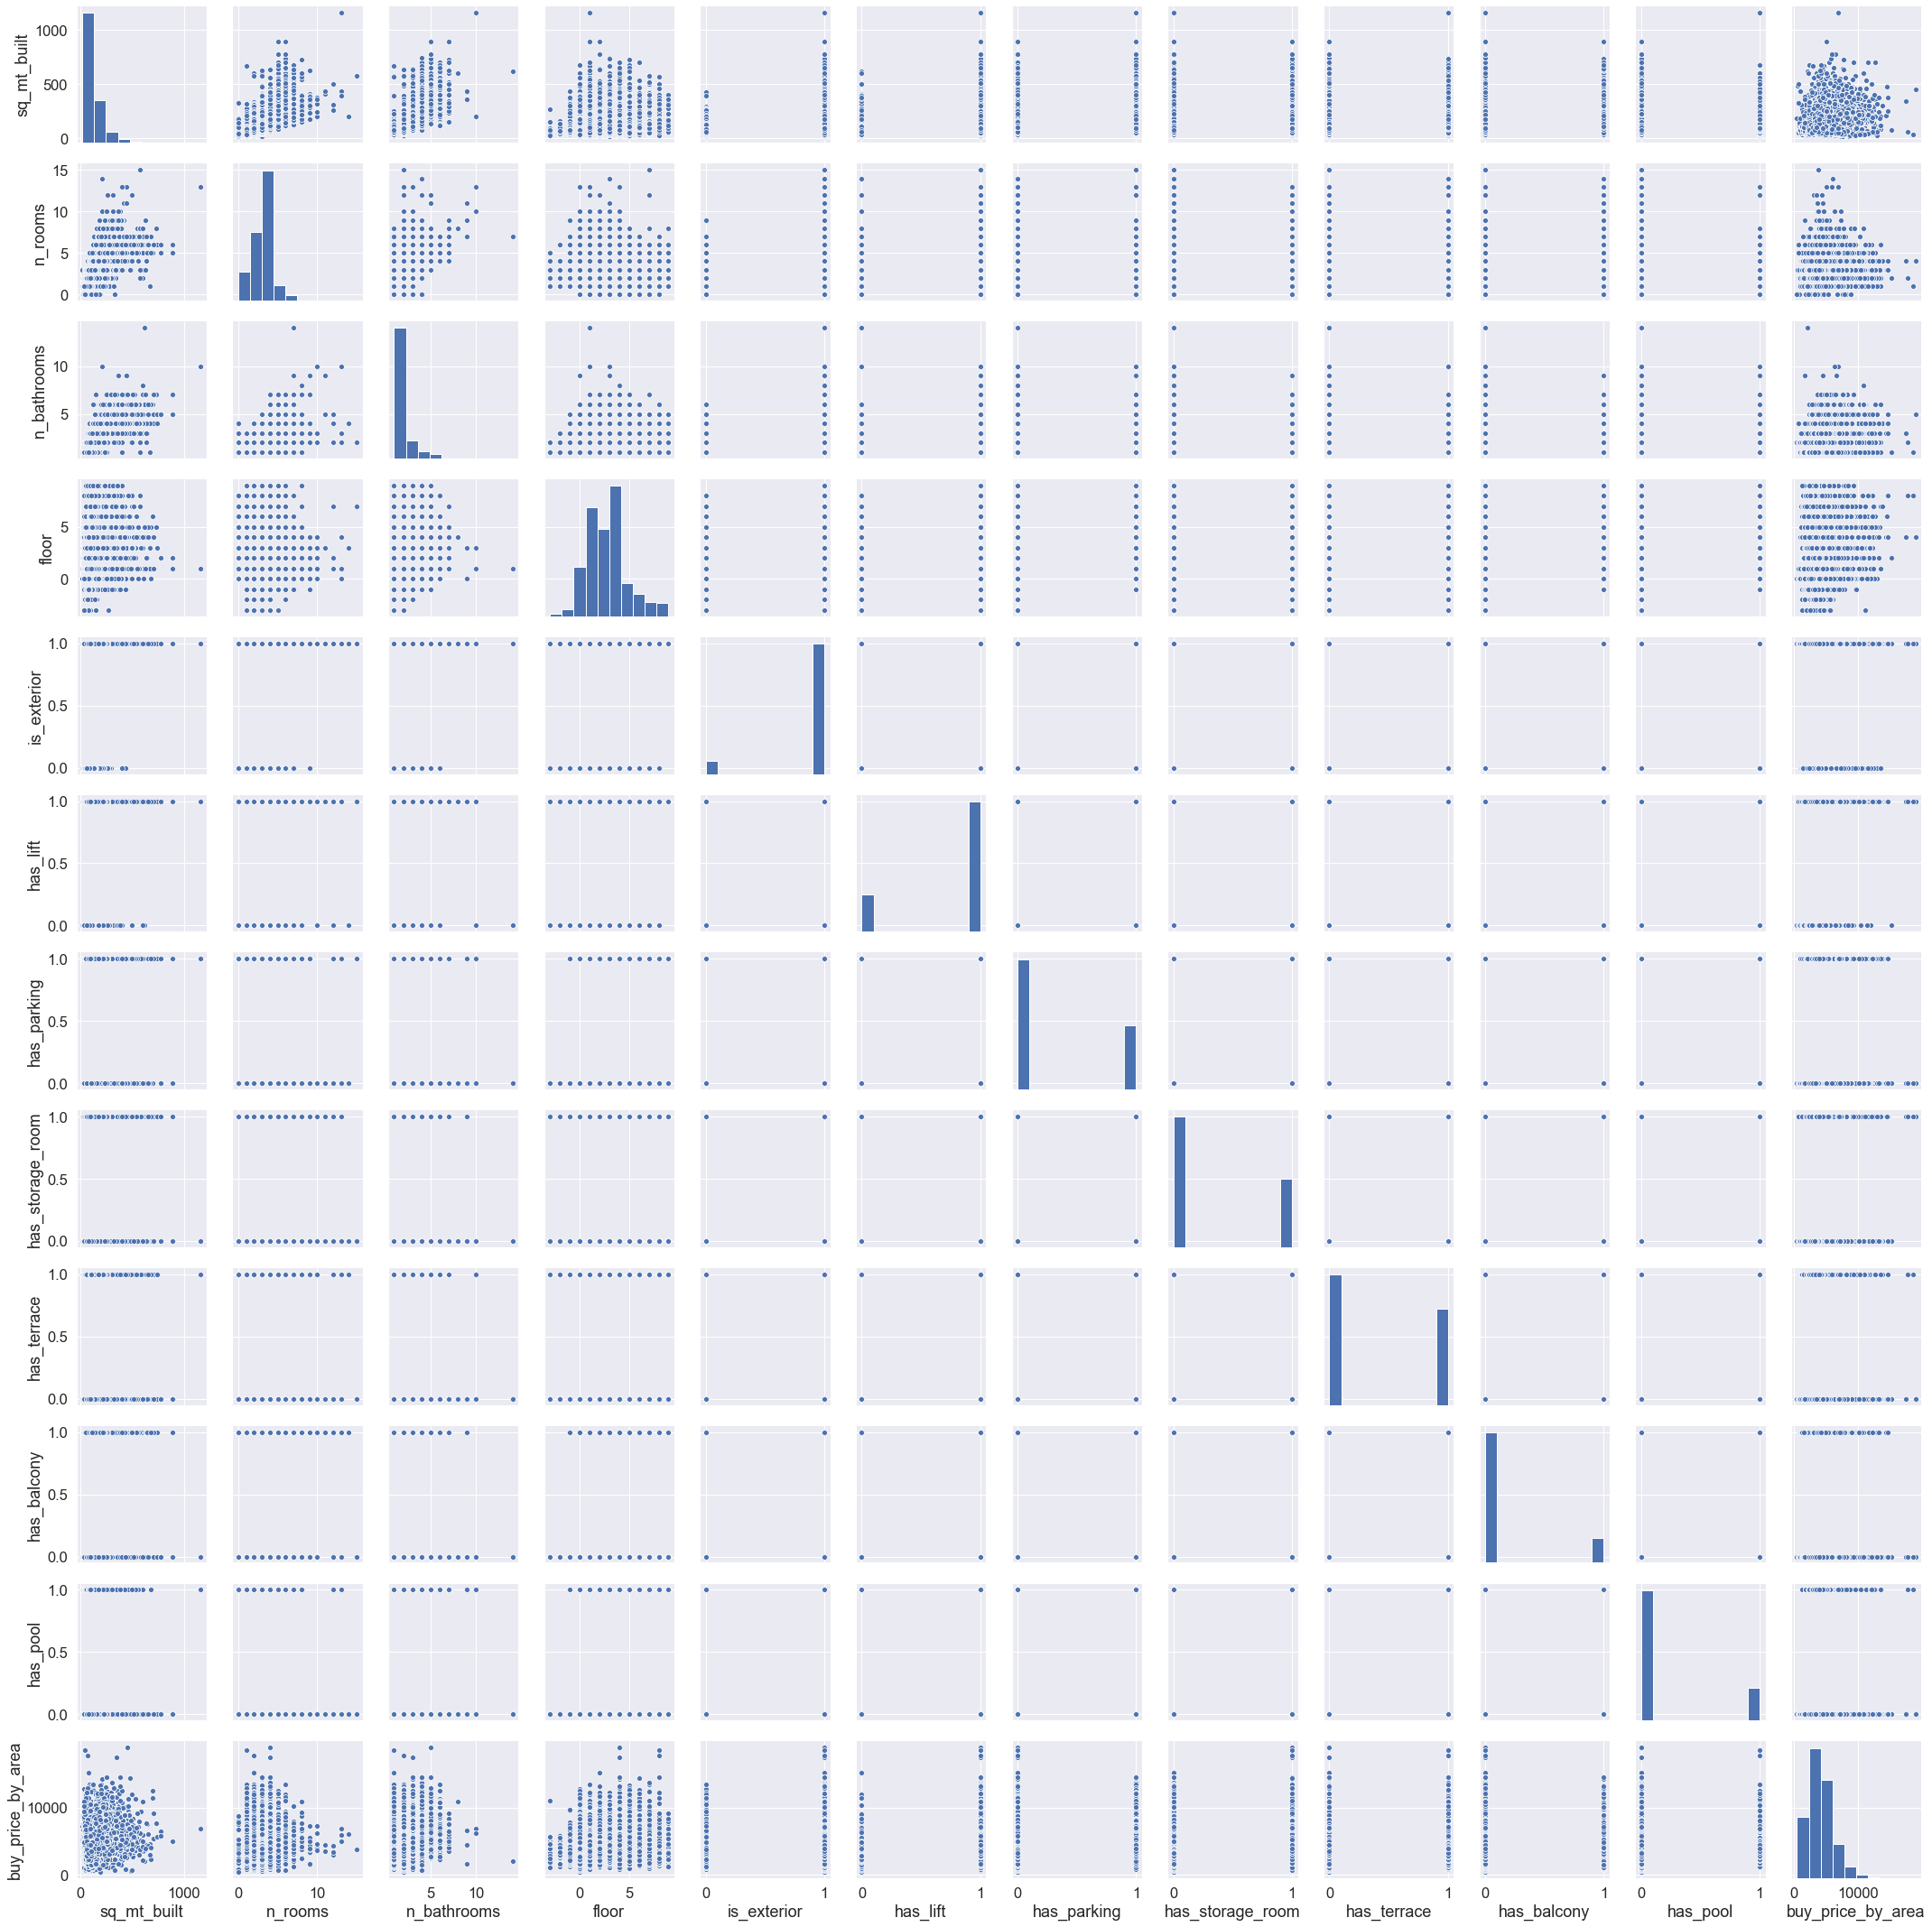

In [14]:
d_analysis1 = data[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'buy_price_by_area']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

In [15]:
data = data [['house_type_id', 'is_renewal_needed', 'is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'buy_price_by_area']]

In [16]:
data

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,buy_price_by_area
0,0,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,40.343263,1328
1,0,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,40.355109,1856
2,0,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,40.345539,1535
3,0,0,0,64.0,2,1.0,0,1,1,0,1,0,0,0,40.345539,1717
4,0,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,40.355841,2407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17393,0,0,0,88.0,2,2.0,1,1,1,1,1,0,0,1,40.459749,4420
17394,0,0,0,99.0,2,2.0,1,1,1,1,1,0,0,1,40.459749,3525
17395,2,0,0,78.0,2,2.0,4,1,1,1,1,0,0,0,40.479840,4487
17396,0,0,0,96.0,2,2.0,3,1,1,1,1,0,0,1,40.459749,4427


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from pyod.models.knn import KNN

In [18]:
columnas = [col for col in data.columns if col not in ['buy_price_by_area']]
X = data[columnas]
y = data['buy_price_by_area']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [20]:
models = {
    "XGBRegressor" : XGBRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [21]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado")

Entrenando XGBRegressor
Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado


-------XGBRegressor-------
RMSE 821.461
R2 0.821
-------DecisionTree-------
RMSE 1106.263
R2 0.675
-------RandomForest-------
RMSE 815.486
R2 0.824
-------ExtraTrees-------
RMSE 938.12
R2 0.767
-------GradientBoosting-------
RMSE 1066.539
R2 0.698
-------HistGradientBoosting-------
RMSE 874.861
R2 0.797
-------Voting-------
RMSE 833.908
R2 0.816


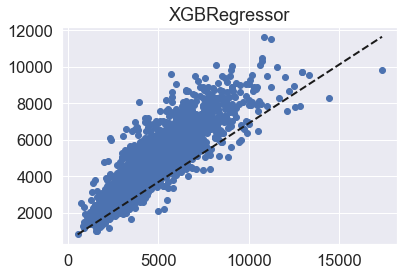

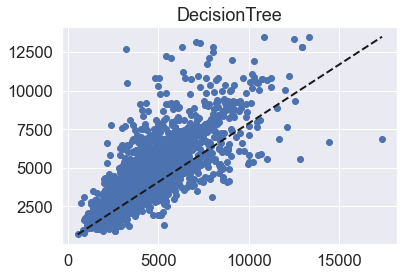

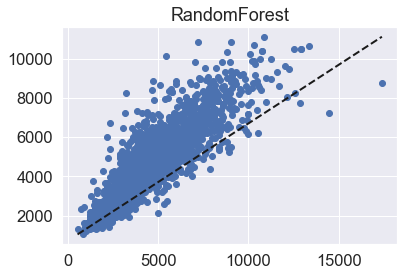

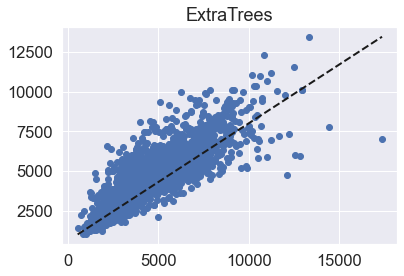

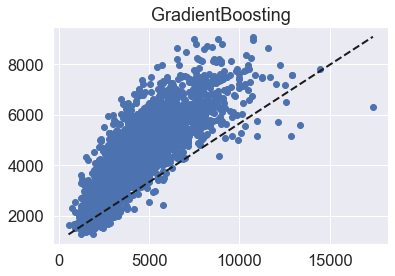

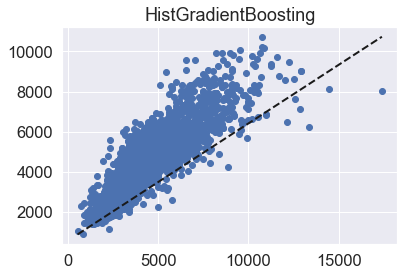

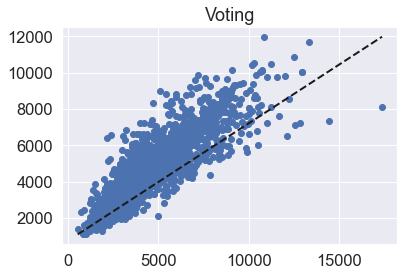

In [22]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [23]:
compara = pd.DataFrame({"y_test": y_test, "y_pred": y_pred, "difference": abs(y_test - y_pred)})

In [24]:
data = pd.concat([data, compara.reindex(compara.index)], axis=1)
data = data.dropna(how='any')

In [28]:
data.sort_values(by="difference", ascending=False)
data["buy"]= data["sq_mt_built"]* data["y_test"]
data["buy_pred"]= data["sq_mt_built"]* data["y_pred"]
data["buy_difference"]= abs(data["buy"]-data["buy_pred"])

In [30]:
data.sort_values(by="buy_difference", ascending=False)

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,...,has_balcony,has_pool,latitude,buy_price_by_area,y_test,y_pred,difference,buy,buy_pred,buy_difference
15841,0,0,0,478.0,3,4.0,6,1,1,1,...,0,0,40.433823,14435,14435.0,7320.0250,7114.9750,6899930.0,3.498972e+06,3.400958e+06
3422,0,1,0,345.0,4,3.0,4,1,1,0,...,0,0,40.413729,17391,17391.0,8091.6975,9299.3025,5999895.0,2.791636e+06,3.208259e+06
5562,1,1,0,602.0,6,3.0,1,1,0,1,...,0,1,40.457749,2153,2153.0,6404.2500,4251.2500,1296106.0,3.855358e+06,2.559252e+06
11838,0,0,0,371.0,5,4.0,5,1,1,1,...,1,1,40.443621,12129,12129.0,6535.8050,5593.1950,4499859.0,2.424784e+06,2.075075e+06
14967,0,0,0,626.0,3,3.0,4,1,1,0,...,1,0,40.417827,3994,3994.0,7237.8400,3243.8400,2500244.0,4.530888e+06,2.030644e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14802,0,0,0,94.0,2,2.0,1,1,1,0,...,0,0,40.426708,5745,5745.0,5745.0000,0.0000,540030.0,5.400300e+05,0.000000e+00
14820,0,0,0,87.0,2,2.0,1,1,1,0,...,0,0,40.426708,5977,5977.0,5977.0000,0.0000,519999.0,5.199990e+05,0.000000e+00
14996,0,0,0,159.0,5,5.0,2,1,1,0,...,0,0,40.426708,5912,5912.0,5912.0000,0.0000,940008.0,9.400080e+05,0.000000e+00
15064,0,0,0,87.0,2,2.0,1,1,1,0,...,0,0,40.426708,5977,5977.0,5977.0000,0.0000,519999.0,5.199990e+05,0.000000e+00


In [33]:
(mean_squared_error(data.buy, data.buy_pred))**0.5

192632.97900442703